In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
#import seaborn as sns
# Set default Seaborn style
#sns.set(style="darkgrid")
#plt.rcParams['figure.figsize'] = (20, 10)
#import warnings
#warnings.filterwarnings('ignore')
from dowhy import gcm, CausalModel
from dowhy.utils import plot, bar_plot
from scipy.stats import truncexpon, halfnorm


### World that is generating the data

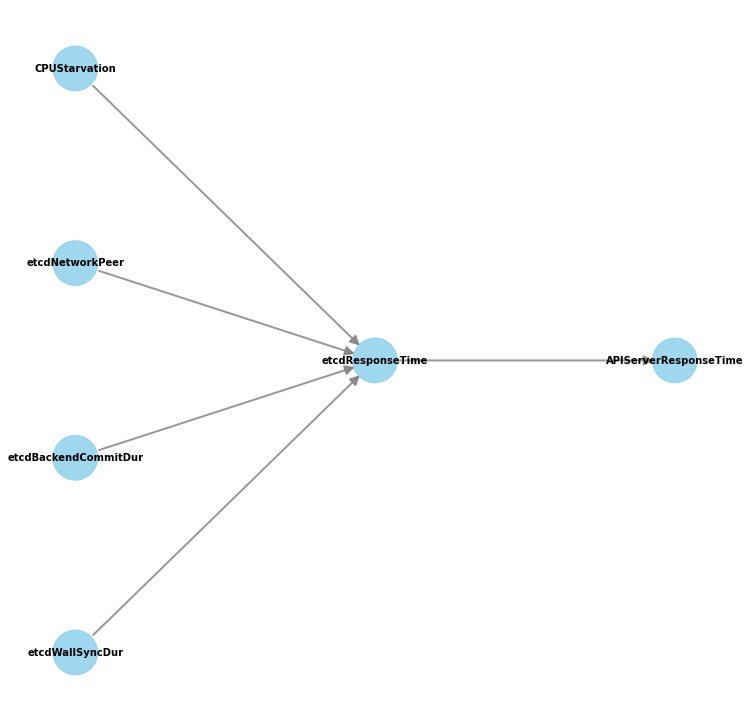

In [4]:
causal_graph_used = nx.DiGraph([('CPUStarvation', 'etcdResponseTime'),
                           ('etcdNetworkPeer', 'etcdResponseTime'),
                           ('etcdBackendCommitDur', 'etcdResponseTime'),
                           ('etcdWallSyncDur', 'etcdResponseTime'),
                           ('etcdResponseTime', 'APIServerResponseTime')
                          ])
plot(causal_graph_used, figure_size=[13, 13])

In [9]:
def create_observed_latency_data(unobserved_intrinsic_latencies):
    observed_latencies = {}
    observed_latencies['CPUStarvation'] = unobserved_intrinsic_latencies['CPUStarvation']
    observed_latencies['etcdNetworkPeer'] = unobserved_intrinsic_latencies['etcdNetworkPeer']
    observed_latencies['etcdBackendCommitDur'] = unobserved_intrinsic_latencies['etcdBackendCommitDur']
    observed_latencies['etcdWallSyncDur'] = unobserved_intrinsic_latencies['etcdWallSyncDur']
    observed_latencies['etcdResponseTime'] = observed_latencies['CPUStarvation'] \
                                         + observed_latencies['etcdNetworkPeer'] \
                                         + observed_latencies['etcdBackendCommitDur']\
                                         + observed_latencies['etcdWallSyncDur']\
                                         + unobserved_intrinsic_latencies['etcdResponseTime']
    observed_latencies['APIServerResponseTime'] = observed_latencies['etcdResponseTime'] \
                                          + unobserved_intrinsic_latencies['APIServerResponseTime']

    return pd.DataFrame(observed_latencies)


def unobserved_intrinsic_latencies_normal(num_samples):
    return {
        'APIServerResponseTime': truncexpon.rvs(size=num_samples, b=2, scale=0.2),
        'etcdResponseTime': halfnorm.rvs(size=num_samples, loc=0.5, scale=0.2),
        'etcdWallSyncDur': truncexpon.rvs(size=num_samples, b=7, scale=0.2),
        'etcdBackendCommitDur': truncexpon.rvs(size=num_samples, b=5, scale=0.2),
        'etcdNetworkPeer': truncexpon.rvs(size=num_samples, b=6, scale=0.2),
        'CPUStarvation': truncexpon.rvs(size=num_samples, b=10, scale=0.2)
    }


normal_data = create_observed_latency_data(unobserved_intrinsic_latencies_normal(10000))
normal_data.to_csv('stable_data.csv')

In [10]:
def unobserved_intrinsic_latencies_anomalous(num_samples):
    return {
        'APIServerResponseTime': truncexpon.rvs(size=num_samples, b=2, scale=0.2),
        'etcdResponseTime': halfnorm.rvs(size=num_samples, loc=0.5, scale=0.2),
        'etcdWallSyncDur': truncexpon.rvs(size=num_samples, b=7, scale=0.2),
        'etcdBackendCommitDur': truncexpon.rvs(size=num_samples, b=5, scale=0.2),
        'etcdNetworkPeer': 2+truncexpon.rvs(size=num_samples, b=6, scale=0.2),
        'CPUStarvation': truncexpon.rvs(size=num_samples, b=10, scale=0.2)
    }


outlier_data = create_observed_latency_data(unobserved_intrinsic_latencies_anomalous(1000))
outlier_data.to_csv('outlier_data.csv')